# Logistic Regression for Image Classification
# 
### This notebook demonstrates training a logistic regression model for classification tasks.

### 1. Import Libraries

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


### 2. Load Data From CSV Files

In [21]:
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    X_train = train_df.drop(columns=["label"]).values
    y_train = train_df["label"].values

    X_test = test_df.drop(columns=["label"]).values
    y_test = test_df["label"].values

    return X_train, y_train, X_test, y_test

In [22]:
train_path = "/home/mohamed/Desktop/FCAI/ML/project/ML_Ptoject/Images/Dataset/train_processed.csv"
test_path = "/home/mohamed/Desktop/FCAI/ML/project/ML_Ptoject/Images/Dataset/test_processed.csv"

print("Loading dataset...")
X_train, y_train, X_test, y_test = load_data(train_path, test_path)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Loading dataset...
Training samples: 34800
Test samples: 12233
Number of features: 1764


### 3. Preprocess Data Using StandardScalar to Standardize Data

In [23]:
def preprocess(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, sc

In [24]:
print("Preprocessing...")
X_train, X_test, sc = preprocess(X_train, X_test)
print("Preprocessing complete!")

Preprocessing...
Preprocessing complete!


### 4. Train Logistic Regression Model

In [25]:
def train_logistic_regression(X_train, y_train):
    classifier = LogisticRegression(max_iter=500, solver='lbfgs')
    classifier.fit(X_train, y_train)

    return classifier

In [26]:
print("Training Logistic Regression...")
model = train_logistic_regression(X_train, y_train)
print("Training complete!")

Training Logistic Regression...
Training complete!


### 5. Evaluate Model Performance

In [27]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    return acc, cm

In [28]:
print("Evaluating...")
acc, cm = evaluate(model, X_test, y_test)

print(f"\nAccuracy: {acc:.4f}")
print("\nConfusion Matrix:")
print(cm)

Evaluating...

Accuracy: 0.6862

Confusion Matrix:
[[4289  402  447]
 [ 367 2368  683]
 [ 926 1014 1737]]


### Display Confusion Matrix


Evaluating...

Accuracy: 0.6862


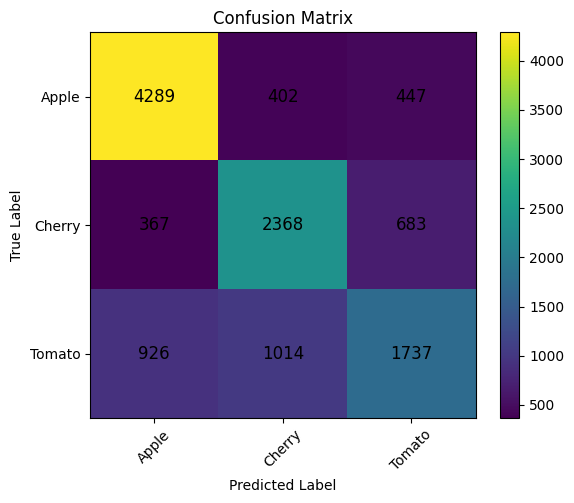

In [31]:
import matplotlib.pyplot as plt
import numpy as np

print("Evaluating...")
acc, cm = evaluate(model, X_test, y_test)

print(f"\nAccuracy: {acc:.4f}")

class_names = ["Apple", "Cherry", "Tomato"]  # adjust if needed

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)

# Write numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 fontsize=12)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [29]:
def plot_roc_curve_multiclass(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)
    
    classes = np.unique(y_test)
    n_classes = len(classes)
    
    y_test_bin = label_binarize(y_test, classes=classes)
    
    plt.figure(figsize=(10, 8))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        plt.plot(fpr[i], tpr[i], lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')
    
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves - Multi-Class Classification', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nAUC Scores by Class:")
    for i in range(n_classes):
        print(f"  Class {classes[i]}: {roc_auc[i]:.4f}")
    
    macro_auc = np.mean(list(roc_auc.values()))
    print(f"\nMacro-Average AUC: {macro_auc:.4f}")
    
    return roc_auc

Generating ROC curves...


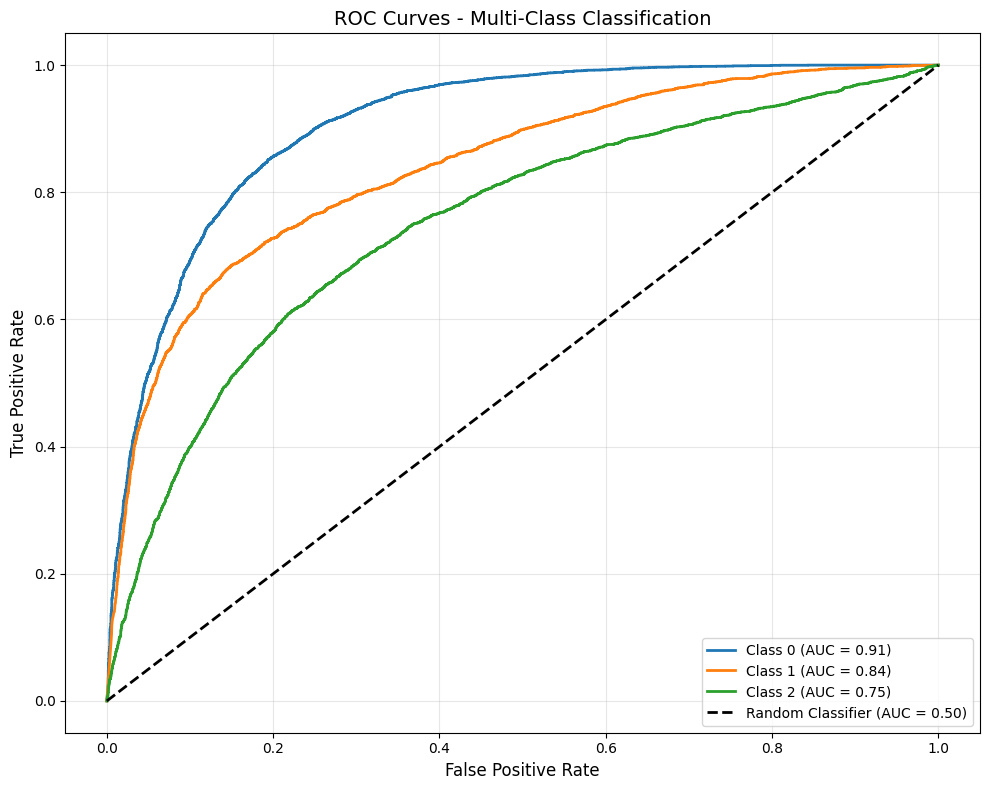


AUC Scores by Class:
  Class 0: 0.9065
  Class 1: 0.8392
  Class 2: 0.7502

Macro-Average AUC: 0.8320


In [30]:
print("Generating ROC curves...")
roc_auc_scores = plot_roc_curve_multiclass(model, X_test, y_test)